In [176]:
import pandas as pd
#from pandas_profiling import ProfileReport
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#### Helpers

In [177]:
def confusionMatrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    data_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
    data_cm.index.name = 'Actual'
    data_cm.columns.name = 'Predicted'

    sns.set(font_scale=1.4)
    fig, ax = plt.subplots(figsize=(12,6))
    
    ax.set(yticks=[-0.5, 1.5], 
       xticks=[0, 1], 
       yticklabels=data_cm.index, 
       xticklabels=data_cm.columns)

    sns.heatmap(data_cm, cmap="Blues", annot=True, fmt='', ax=ax)
    return data_cm

# Loading data

In [178]:
raw_train_features = pd.read_csv('train_values.csv')
raw_train_labels = pd.read_csv('train_labels.csv')
raw_test_features = pd.read_csv('test_values.csv')


# Feature Engineering

### Dealing with categorical variables

In [179]:
# One hot encoding of categorical variables

def hot_encode(df, lst):
    for i in lst:
        variable_df = pd.get_dummies(df[i], prefix = i)
        df = pd.concat([df, variable_df], axis=1)
        df = df.drop([i], axis=1)
    
    return df

categorical_features = ['foundation_type', 'land_surface_condition', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
extended_train_features = hot_encode(raw_train_features, categorical_features)

### Feature: Age

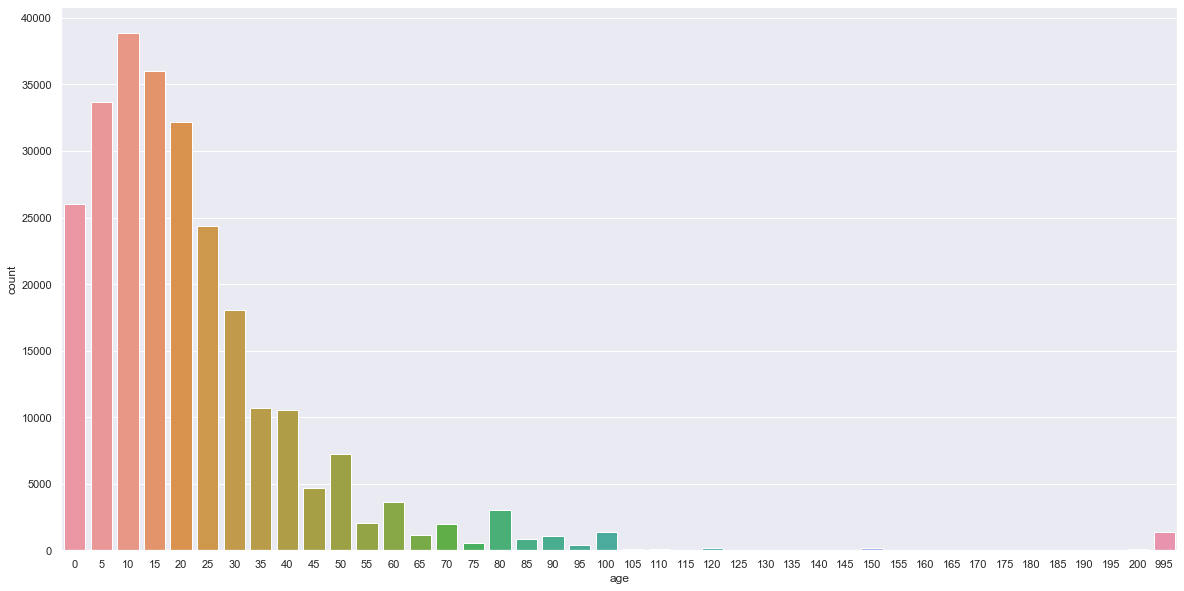

In [180]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
ax = sns.countplot(extended_train_features.age)

In [181]:
num_buildings = len(extended_train_features[extended_train_features.age > 100])
print('Number of buildings with more than 100 years:', num_rows, ', which represent ', weight_buildings, ' of the samples')
weight_buildings = len(extended_train_features[extended_train_features.age > 100]*100)/len(extended_train_features)

Number of buildings with more than 100 years: 2124 , which represent  0.008150390827356763  of the samples


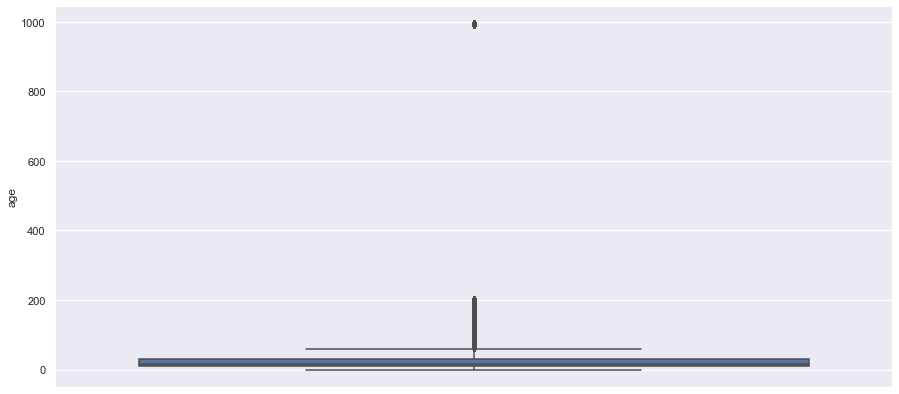

In [182]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,7))
ax = sns.boxplot(y=extended_train_features.age)
# ax = sns.scatterplot(x=raw_train_labels.damage_grade, y=extended_train_features.age)


In [183]:
extended_train_features.age.describe()

count    260601.000000
mean         26.535029
std          73.565937
min           0.000000
25%          10.000000
50%          15.000000
75%          30.000000
max         995.000000
Name: age, dtype: float64

In [184]:
# Drop buildings with more that 100 years from train features and labels

building_index = extended_train_features[extended_train_features.age > 100].index
extended_train_labels = raw_train_labels.copy()
extended_train_labels.drop(building_index, inplace=True)
extended_train_features.drop(building_index, inplace=True)
print(len(extended_train_labels))
print(len(extended_train_features))

258477
258477


In [187]:
# Normalizing data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_features_scaled = scaler.fit_transform(np.array(extended_train_features.iloc[:, 5]).reshape(-1,1))

extended_train_features.age = train_features_scaled

extended_train_features.age

0         0.30
1         0.10
2         0.10
3         0.10
4         0.30
          ... 
260596    0.55
260597    0.00
260598    0.55
260599    0.10
260600    0.10
Name: age, Length: 258477, dtype: float64

# Preparing the data for the ML models 

### Features and labels

In [24]:
labels = raw_train_labels['damage_grade']
labels = np.array(labels)

# Remove building id
features = extended_train_features.loc[:, extended_train_features.columns != 'building_id']
features = np.array(extended_train_features)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,22,418,10694,2,10,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,0,1,0,...,0,0,0,1,0,0,0,0,1,0
260597,17,715,2060,2,0,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
260598,17,51,8163,3,55,6,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0
260599,26,39,1851,2,10,14,6,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Split data

In [5]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 5, shuffle=True)
print('Shape of data')
print(train_features.shape)
print(train_labels.shape)
print(test_features.shape)
print(test_labels.shape)
print("")


Shape of data
(182420, 69)
(182420,)
(78181, 69)
(78181,)



### Distribution of train labels

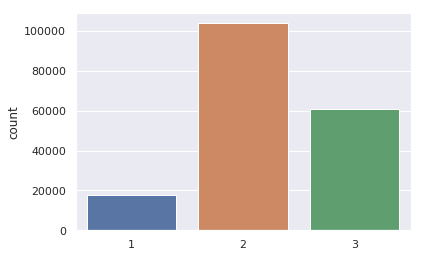

In [7]:
sns.set(style="darkgrid")
ax = sns.countplot(train_labels)

### Classes weights 

In [8]:
total_count = (sum(train_labels == 1) + sum(train_labels == 2) + sum(train_labels == 3))
actual_weight_1 = sum(train_labels == 1) * 100 / total_count
actual_weight_2 = sum(train_labels == 2) * 100 / total_count
actual_weight_3 = sum(train_labels == 3) * 100 / total_count
print('Class 1: ', actual_weight_1)
print('Class 2: ',actual_weight_2)
print('Class 3: ',actual_weight_3)

Class 1:  9.608047363227715
Class 2:  56.96140774037934
Class 3:  33.43054489639294


# Models

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

### SVM

In [ ]:
svm_model = SVC(kernel = 'linear', class_weight={1:0.23, 2:0, 3:0.001},random_state=5).fit(train_features, train_labels)


In [12]:
svm_prediction = svm_model.predict(test_features)

0.41


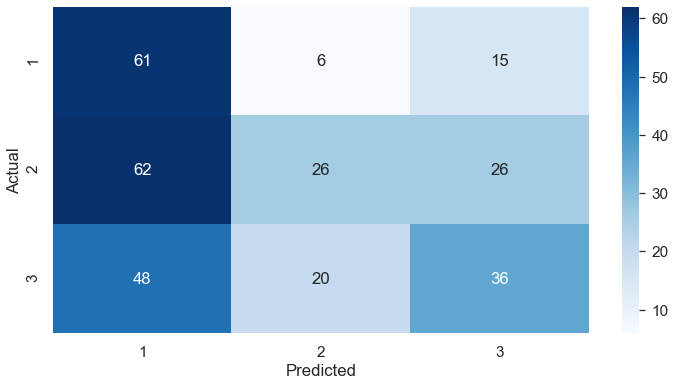

In [13]:

svm_cm = confusionMatrix(test_labels, svm_prediction)
svm_accuracy = accuracy_score(test_labels, svm_prediction)
print(accuracy)

### Random Forest

In [9]:
random_forest1 = RandomForestClassifier(n_estimators = 100)
random_forest1.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
random_prediction1 = random_forest1.predict(test_features)

0.7151353909517658

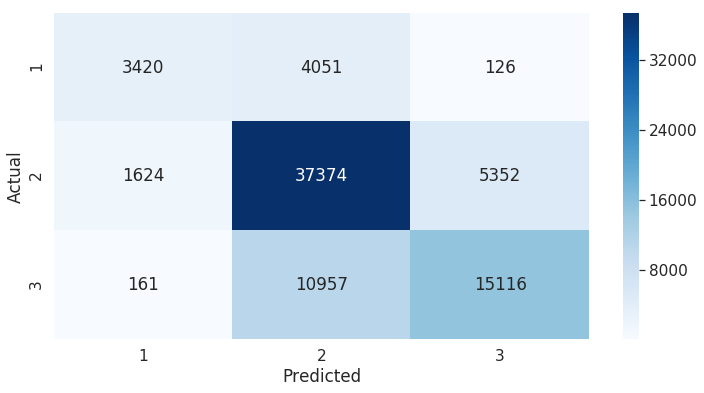

In [11]:
random_cm1 = confusionMatrix(test_labels, random_prediction1)
f1_score(test_labels, random_prediction1, average = 'micro')

### Logistic Regression

In [10]:
logistic_model = LogisticRegression(random_state = 5, multi_class = 'ovr', verbose = 1).fit(train_features, train_labels)

[LibLinear]

In [11]:
logistic_prediction = logistic_model.predict(test_features)

0.5672733784423325

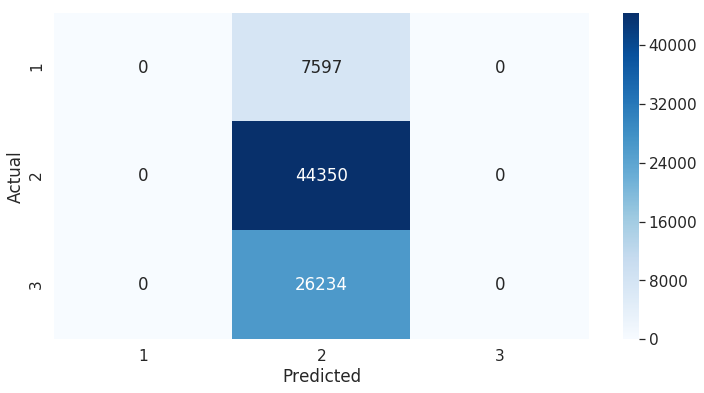

In [12]:
random_cm = confusionMatrix(test_labels, logistic_prediction)
f1_score(test_labels, logistic_prediction, average = 'micro')

### Neuronal Networks

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical



In [32]:
# One hot encode train and test labels

label_encoder = LabelEncoder()
enc_train_labels = label_encoder.fit_transform(train_labels)
onehot_train_labels = to_categorical(enc_train_labels, num_classes=3)

label_encoder = LabelEncoder()
enc_test_labels = label_encoder.fit_transform(test_labels)
onehot_test_labels = to_categorical(enc_test_labels, num_classes=3)




In [26]:
### Define the model

NB_EPOCHS = 1000
BATCH_SIZE = 16

nn_model = Sequential()

# Input layer
nn_model.add(Dense(512, input_shape = (69,), activation = 'relu'))

# Hidden layer
nn_model.add(Dense(218, activation = 'relu'))

# Hidden layer
nn_model.add(Dense(64, activation = 'relu'))

# Output layer
nn_model.add(Dense(3, activation = 'softmax'))

nn_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

ckpt_model = 'pima-weights.best.hdf5'
checkpoint = ModelCheckpoint(ckpt_model, 
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

nn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               8960      
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 195       
Total params: 17,411
Trainable params: 17,411
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Train the model

history = nn_model.fit(train_features,
                       onehot_train_labels,
                       validation_data = (test_features, onehot_test_labels),
                       nb_epoch = NB_EPOCHS,
                       batch_size = BATCH_SIZE,
                       callbacks = callbacks_list,
                       verbose = 0)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':



Epoch 00001: val_acc improved from -inf to 0.09717, saving model to pima-weights.best.hdf5

Epoch 00002: val_acc did not improve from 0.09717

Epoch 00003: val_acc did not improve from 0.09717

Epoch 00004: val_acc did not improve from 0.09717

Epoch 00005: val_acc did not improve from 0.09717

Epoch 00006: val_acc did not improve from 0.09717

Epoch 00007: val_acc did not improve from 0.09717

Epoch 00008: val_acc did not improve from 0.09717

Epoch 00009: val_acc did not improve from 0.09717

Epoch 00010: val_acc did not improve from 0.09717

Epoch 00011: val_acc did not improve from 0.09717

Epoch 00012: val_acc did not improve from 0.09717

Epoch 00013: val_acc did not improve from 0.09717

Epoch 00014: val_acc did not improve from 0.09717

Epoch 00015: val_acc did not improve from 0.09717

Epoch 00016: val_acc did not improve from 0.09717

Epoch 00017: val_acc did not improve from 0.09717

Epoch 00018: val_acc did not improve from 0.09717

Epoch 00019: val_acc did not improve fro

KeyboardInterrupt: 